In [1]:
print("Hello world!")


Hello world!


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
from deepface import DeepFace
from mtcnn.mtcnn import MTCNN
import os
import shutil


1/1 [==============================] - 0s 118ms/step


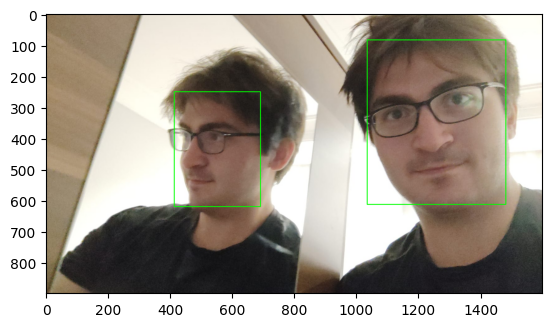

In [22]:
detector = MTCNN()
img = cv.imread('./faces/double_ibo.jpeg')
# img = cv.imread('./faces/bayzans.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
results = detector.detect_faces(img)

for result in results:
    x, y, w, h = result['box']
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    plt.imshow(img)

In [35]:
# we will go over each face in ./train/number.jpg and try to detect the face in each image MTCNN will be used for this

detector = MTCNN()

number_of_faces = []
confidences = []

train_images = os.listdir('./train')
number_of_images = len(train_images)
number_of_images

for i in range(1, 1000):
    img = cv.imread('./train/{}.jpg'.format(i))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    results = detector.detect_faces(img)

    number_of_faces.append(len(results))
    
    if results:  # Check if results is not empty
        confidences.append(results[0]['confidence'])
        for result in results:
            x, y, w, h = result['box']
            cv.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
            # plt.imshow(img)  # This line is commented out to suppress the output
    else:
        confidences.append(0)  # Append 0 or another placeholder if no faces are detected

print("The algorithm detected {} faces in the images".format(sum(number_of_faces)))




1/1 [==============================] - 0s 14ms/step
The algorithm detected 944 faces in the images


In [24]:
# This is the face extractor class, 
# it finds the faces in the images and crops them out, and saves them in a directory if save is set to True


class FaceExtractor:
    def __init__(self, directory, detector=MTCNN(), size=(224, 224), save=False):
        self.directory = directory
        self.save = save
        self.size = size
        self.detector = detector

    def extract_faces(self, limit=1e+9, overwrite=False):
        images = os.listdir(self.directory)
        number_of_images = len(images)

        if overwrite:
            try:
                shutil.rmtree('./extracted_faces')
            except:
                pass

        try:
            os.mkdir('./extracted_faces')
        except:
            pass

        faces_xywh = []
        for i in range(number_of_images):
            faces_xywh.append([])
            # get image they are not numbered
            img = cv.imread('{}/{}'.format(self.directory, images[i]))
            img_cvt = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            img_name = images[i]
            results = self.detector.detect_faces(img_cvt)
            j = 0
            for result in results:
                x, y, w, h = result['box']
                faces_xywh[i-1].append([x, y, w, h])
                if self.save:
                    face = img[y:y+h, x:x+w]
                    face = cv.resize(face, self.size)
                    cv.imwrite('./extracted_faces/{}_{}.jpg'.format(i, j), face)
                if i > limit:
                    break
                j += 1
        return faces_xywh
    

    
    
detector = MTCNN()
faces_xywh = FaceExtractor('./testing_', save=True).extract_faces(limit=5, overwrite=True)
    
    



1/1 [==============================] - 0s 19ms/step


In [ ]:
# Load the pre-trained model and weights
modelFile = "res10_300x300_ssd_iter_140000_fp16.caffemodel"
configFile = "deploy.prototxt"
net = cv.dnn.readNetFromCaffe(configFile, modelFile)

# Function to detect faces
def detect_faces(image_path):
    image = cv.imread(image_path)
    (h, w) = image.shape[:2]

    # Preprocess the input image
    blob = cv.dnn.blobFromImage(cv.resize(image, (300, 300)), 1.0,
                                 (300, 300), (104.0, 177.0, 123.0))

    # Pass the blob through the network
    net.setInput(blob)
    detections = net.forward()

    # Loop over the detections
    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]

        # Filter out weak detections
        if confidence > 0.5:
            # Compute the coordinates of the bounding box
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # Draw the bounding box
            cv.rectangle(image, (startX, startY), (endX, endY),
                          (0, 255, 0), 2)

    # Display the output
    cv.imshow("Output", image)
    cv.waitKey(0)
    cv.destroyAllWindows()

# Replace with your image path
image_path = ".\\faces\\9.jpg" 
detect_faces(image_path)

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\layers\convolution_layer.cpp:389: error: (-215:Assertion failed) !blobs.empty() || inputs.size() > 1 in function 'cv::dnn::ConvolutionLayerImpl::getMemoryShapes'
